In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import json
from scipy import stats

### Домашнее задание 2. Интерпретация результатов АБ-теста

Срок сдачи: 31 марта 18:00

На мобильной версии Авито провели тест на добавление рекламного баннера на карточку товара между описанием и блоком рекомендаций.

Продуктовая гипотеза:
Добавление рекламного баннера будет приводить к увелечинию выручки без ущерба пользовательскому опыт.

<div>
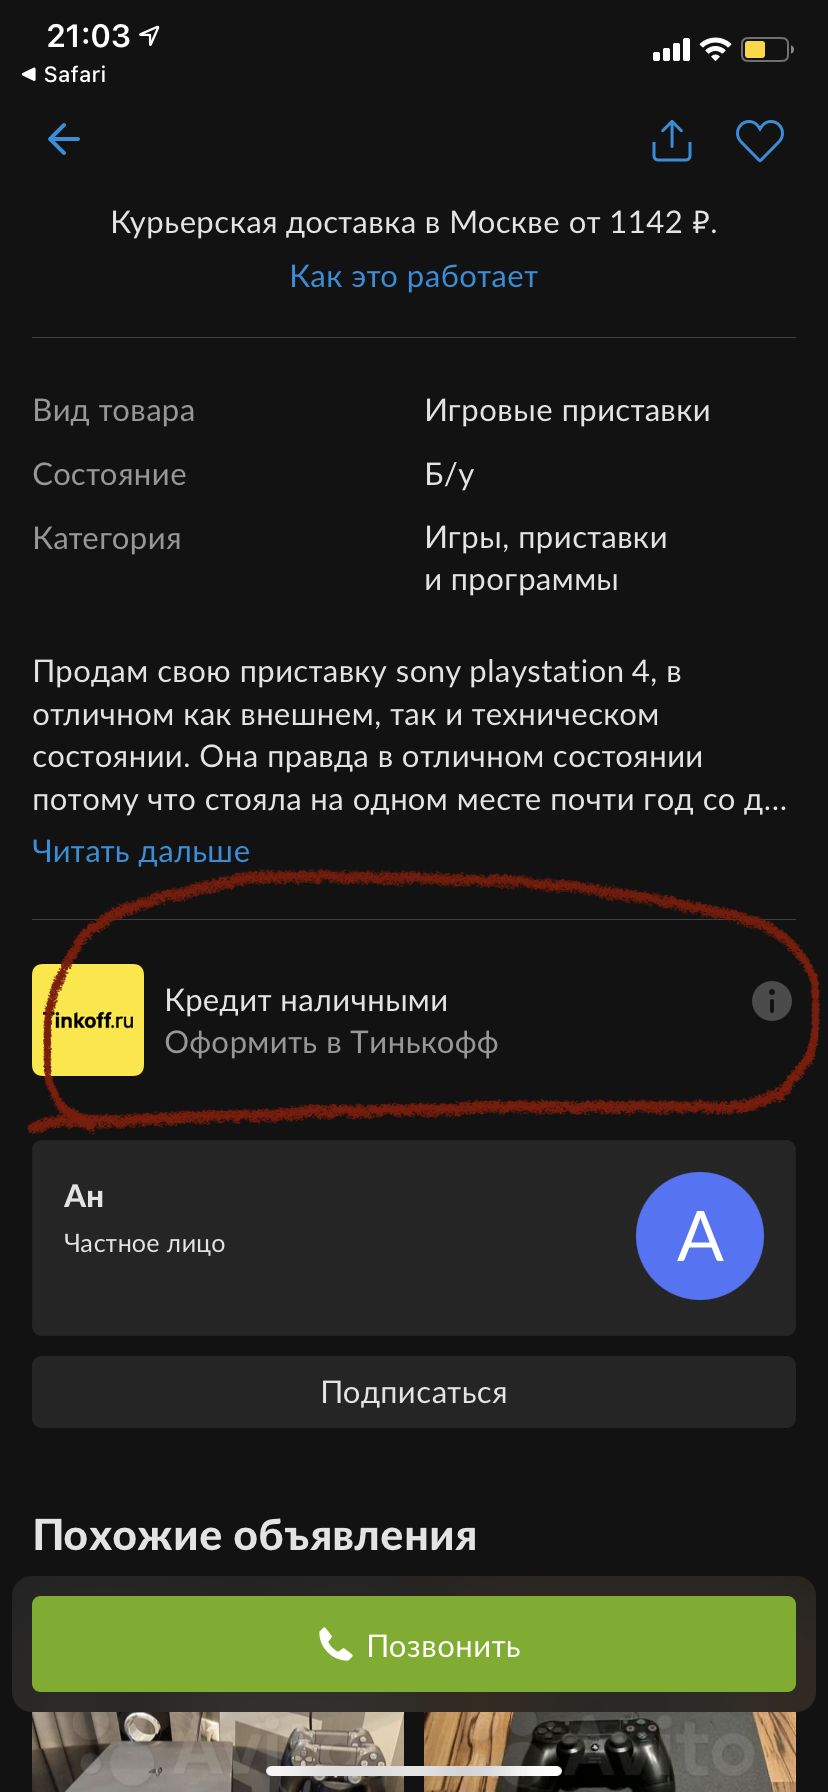
</div>

Задание:
1. Загрузите файл с данными, собранными за время аб теста.

2. На основе имеющихя в файле метрик формализуйте продуктовую гипотезу. Помимо количественных метрик рекомендую использовать ratio-метрики и метрики аггрегированные по пользователям(например, количество пользователей совершивших контакт) и при анализе теста обратите внимание на их чувтсвительность. (2 балла)

3.  Используя критерий Стьюдента, проинтерпретируйте как изменились средние выборок для выбранных вами метрик. Используйте уровень значимости 0.01.(2 балла)

4.  Выборка разделена на 200 бакетов. Примените к бакетам критерий Стьюдента и проинтерпретируйте как изменились средние выборок для выбранных вами метрик. Используйте уровень значимости 0.01. Сравните результаты с предыдущим пунктом. (2 балла)

6. Для анализа сформулированных в п.2 ratio-метрик воспольуйтесь Бутстрэпом. Являются ли эти метрики более чувствительными, чем базовые метрики? (2 балла)

7. Проинтерпретируйте результаты и сделайте выводы об изменениях для продукта. Рекомендуете ли вы изменение к запуску на 100% пользователей? (2 балла)

Формат данных

cookie_id - ид пользователя

split_group	- тестовая группа

searches - количество поисков

item_views - количество просмотров объявлений

contacts - количество контактов пользователя с продавцом	

rec_item_views - количество просмотров объявлений с рекомендацией

rec_contacts - контакты с рекомендацией

contact_cookie - пользователь, совершил контакт

advertising_clicks - клики на всю рекламу(Помимо добавленного баннера есть ещё баннеры в других местах. Эта метрика их учитывает.)

bucket - бакет

In [2]:
df = pd.read_csv('banner_test_results.csv')

In [4]:
df.tail()

,cookie_id,split_group,searches,item_views,contacts,rec_item_views,rec_contacts,contact_cookie,advertising_clicks,bucket
1010800,3967387067306,test,0,44,0,0,0,0,1,106
1010801,3967407032924,control,0,5,0,1,0,0,1,124
1010802,3967507007864,control,40,166,7,30,1,1,1,64
1010803,3967529533807,control,2,10,0,1,0,0,1,7
1010804,3967537014001,control,10,43,8,0,0,1,3,1
